# Lab 7
* **Name**: Utkarsh Prakash
* **Roll Number**: 180030042

## Title
Demostrate the working principle of convolution neural networks.

## Objective
* To observe the translation invariant property of pooling layer in a CNN.
* To understand the working of the backpropagation algorithm with max pooling layer.

## Hypothesis:
* If there is slight translation in the image then also the max pool of the output must remain approximately the same.
* The backpropagation should be able to learn the weights in the case of a CNN with max pooling layer.

## Experimental Description:
1. **Data Generation:**

    We use MNIST data for training and testing.
   
2. **Operations:**

    Let $X$ represents the matrix of training examples where each training example is stacked as a column of the matrix. Let $y$ represent the desired output of the network $y'$ the actual output of the network.

   The error between the desired output vectors $(y)$ and the actual output vectors $(y')$ is given as follows:
   
   <center> $E = \frac{1}{m} ||y - y'||_{2}^{2}$ </center>
    
    **Forward Propagation:**
    
    <center> $z^{[1]} = conv(X, W^{[1]})$ </center>
    <center> $a^{[1]} = relu(z^{[1]})$ </center>
    <center> $m^{[1]} = max_pool(a^{[1]})$ </center>
    <center> $f^{[1]} = flatten(m^{[1]})$ </center>
    <center> $z^{[2]} = W^{[2]}f^{[1]}$ </center>
    <center> $a^{[2]} = \sigma(z^{[2]})$ </center>
    
    **Backward Propagation:**
    
    <center> $ \frac{\partial L}{\partial z^{[2]}}  = (a^{[2]}-y)*(a^{[2]})*(1-a^{[2]}) $ </center>
    
    <center> $ \frac{\partial L}{\partial w^{[2]}} = \frac{\partial L}{\partial z^{[2]}} (f^{[1]})^T $ </center>
    
    <center> $ \frac{\partial l}{\partial f^{[1]}} = (W^{[2]})^{T}\frac{\partial L}{\partial z^{[2]}} $ </center>
    
    <center> $ \frac{\partial l}{\partial m^{[1]}} = \frac{\partial l}{\partial f^{[1]}}.reshape() $ </center>
    
    <center> $ \frac{\partial l}{\partial a^{[1]}} = \frac{\partial l}{\partial m^{[1]}} $ where mask = 1 else 0 </center>
    
    <center> $ \frac{\partial l}{\partial z^{[1]}} = \frac{\partial l}{\partial a^{[1]}}*relu^{'}(z^{[1]}) $ </center>
    
    <center> $ \frac{\partial l}{\partial w^{[1]}} = conv(\frac{\partial l}{\partial z^{[1]}}, X) $ </center>
   
3. **Training:**
    
    During training we first do forward propagation and then do backpropagation to find the derivatives of weights and biases. This is done several times.
    
## Implementation

In [1]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7907 sha256=49d82515aa4cbd8e22ddc30a630464746bfef0b56227689481f066fa2e1e6afc
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from google.colab import drive
import os
import idx2numpy

### MNIST Dataset

In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/gdrive/My Drive/Clustering')

(60000, 28, 28)
(60000,)


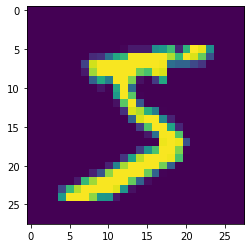

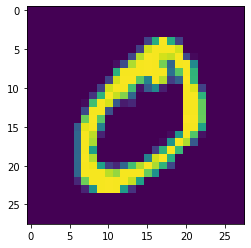

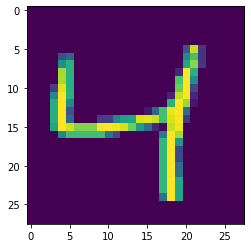

In [110]:
file1='train-images.idx3-ubyte'
file2='train-labels.idx1-ubyte'

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

print(Images.shape)
print(labels.shape)

for i in range(3):
    plt.figure()
    plt.imshow(Images[i], cmap='viridis')
    plt.show()

In [111]:
class_1 = Images[labels == 1]         # Images of digit 1
class_5 = Images[labels == 5]         # Images of digit 5

X = np.concatenate([class_1[:100, :, :], class_5[:100, :, :]], axis=0)   # X_train
X = X/255.0         # Normalizing the input

y = np.c_[np.ones((1, 100)), np.zeros((1, 100))]      # Class Labels

print(class_1.shape, class_5.shape, X.shape)

(6742, 28, 28) (5421, 28, 28) (200, 28, 28)


### Part 1: Translation invariant Property

In [112]:
shifted_X = np.concatenate((X[:,:,2:], X[:, :, :2]) , axis = -1)      # Shifted Data

In [113]:
# Kernel for vertical edge detection
kernel = np.array([[1, 0, -1],
                  [1, 0, -1],
                  [1, 0, -1]])

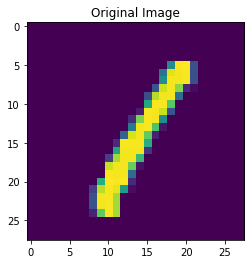

In [114]:
plt.figure()
plt.imshow(X[0], cmap='viridis')
plt.title("Original Image")
plt.show()

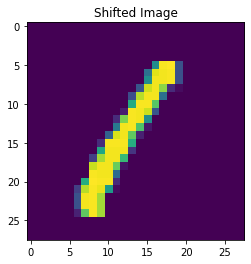

In [115]:
plt.figure()
plt.imshow(shifted_X[0], cmap='viridis')
plt.title("Shifted Image")
plt.show()

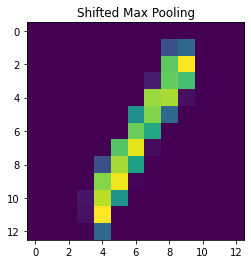

In [116]:
z1 = conv2D(np.expand_dims(shifted_X[0], axis=0), kernel)       # Convolution operation
a1 = relu(z1)                                                   # Activation
m1, mask1 = pool2D(a1, 2)                                       # Max pooling

plt.figure()
plt.imshow(m1[0], cmap='viridis')
plt.title("Shifted Max Pooling")
plt.show()

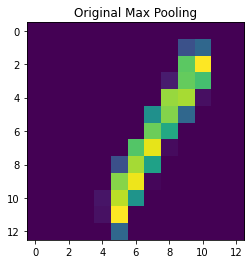

In [117]:
z1 = conv2D(np.expand_dims(X[0], axis=0), kernel)        # Convolution operation
a1 = relu(z1)                                            # Activation
m1, mask1 = pool2D(a1, 2)                                # Max pooling

plt.figure()
plt.imshow(m1[0], cmap='viridis')
plt.title("Original Max Pooling")
plt.show()

### Part 2: Implementation of Backpropagation

In [4]:
def init_kernel(kernel_size):
    '''
        This function initializes a 2D kernel.
    '''
    return np.random.randn(kernel_size[0], kernel_size[1])    # Kernel initialization

In [104]:
def conv2D(images, kernel):
    '''
        This function calculates the 2D convolution between images and kernel.
    '''
    m = images.shape[0]           # Number of training examples
    
    convolutions = []             # List for storing convolutions
    
    # Iterating over training examples
    for i in range(m):
        convolution = signal.convolve2d(images[i], kernel, boundary='symm', mode='valid')   # Convolution calculation
        convolutions.append(convolution)
        
    return -1*np.array(convolutions)

In [7]:
def relu(z):
    '''
        This function calculates the ReLU function for z.
    '''
    return np.where(z > 0, z, 0)

In [8]:
def derivative_of_relu(z):
    '''
        This function calculates the derivative of ReLU
        activation function at z.
    '''
    return np.where(z > 0, 1, 0)

In [105]:
def pool2D(images, kernel_size):
    '''
        This function performs Max pooling with a stride of 2.
    '''
    m = images.shape[0]         # Number of training examples
    
    pools = []                  # List for storing pooled output
    masks = []                  # List for storing index of maximum value

    # Iterating over training examples
    for i in range(m):
        output_size = (images.shape[1]//kernel_size, images.shape[2]//kernel_size)

        pool = np.empty(shape = output_size)        # Empty array for each training example
        mask = np.zeros(images[0].shape)            # Inital mask array

        for j in range(0, images.shape[1], 2):
            for k in range(0, images.shape[2], 2):
                sub_matrix = images[i, j:j+kernel_size, k:k+kernel_size]

                pool[j//2][k//2] = np.amax(sub_matrix)          # Max pooling
                arg_max = np.unravel_index(sub_matrix.argmax(), sub_matrix.shape)     # Index for max calculation
                mask[j+arg_max[0]][k+arg_max[1]] = 1
                
        pools.append(pool)
        masks.append(mask)
        
    return np.array(pools), np.array(masks)

In [13]:
def sigmoid(z):
    '''
        This function calculates the sigmoid function of z.
    '''
    return 1/(1 + np.exp(-z))

**Forward Propagation:**
<center> $z^{[1]} = conv(X, W^{[1]})$ </center>
<center> $a^{[1]} = relu(z^{[1]})$ </center>
<center> $m^{[1]} = max_pool(a^{[1]})$ </center>
<center> $f^{[1]} = flatten(m^{[1]})$ </center>
<center> $z^{[2]} = W^{[2]}f^{[1]}$ </center>
<center> $a^{[2]} = \sigma(z^{[2]})$ </center>

In [106]:
def forward_propagation(images, kernel, w2=None, w2_init=False, pool_kernel_size=2):
    '''
        This function performs the forward propagation for the CNN.
    '''

    cache = {}          # Dictionary for storing results of forward prop
    
    cache["z1"] = conv2D(images, kernel)        # Convolution
    cache["a1"] = relu(cache["z1"])             # ReLU activation
    cache["m1"], cache["mask1"] = pool2D(cache["a1"], pool_kernel_size)     # Max pooling
    cache["f1"] = cache["m1"].reshape(images.shape[0], cache["m1"].shape[1]*cache["m1"].shape[2]).T   # Flatten
    
    cache["w2"] = np.random.randn(1, cache["f1"].shape[0]) if w2_init else w2   # Weight initalization 

    cache["z2"] = np.dot(cache["w2"], cache["f1"])      # z2 calculation
    cache["a2"] = sigmoid(cache["z2"])                  # a2 calculation
    
    return cache

**Backward Propagation:**
<center> $ \frac{\partial L}{\partial z^{[2]}}  = (a^{[2]}-y)*(a^{[2]})*(1-a^{[2]}) $ </center>
    
<center> $ \frac{\partial L}{\partial w^{[2]}} = \frac{\partial L}{\partial z^{[2]}} (f^{[1]})^T $ </center>

<center> $ \frac{\partial l}{\partial f^{[1]}} = (W^{[2]})^{T}\frac{\partial L}{\partial z^{[2]}} $ </center>

<center> $ \frac{\partial l}{\partial m^{[1]}} = \frac{\partial l}{\partial f^{[1]}}.reshape() $ </center>

<center> $ \frac{\partial l}{\partial a^{[1]}} = \frac{\partial l}{\partial m^{[1]}} $ where mask = 1 else 0 </center>

<center> $ \frac{\partial l}{\partial z^{[1]}} = \frac{\partial l}{\partial a^{[1]}}*relu^{'}(z^{[1]}) $ </center>

<center> $ \frac{\partial l}{\partial w^{[1]}} = conv(\frac{\partial l}{\partial z^{[1]}}, X) $ </center>

In [107]:
def backward_propagation(images, y, kernel, cache, pool_kernel_size=2):
    '''
        This function is for performing backward propagation for a CNN.
    '''
    m = images.shape[0]       # Number of training examples
    gradients = {}            # Dictionary for storing the gradients
    
    gradients["dz2"] = -1*(y-cache["a2"])*cache["a2"]*(1-cache["a2"])      # dz2 calculation
    gradients["dw2"] = np.dot(gradients["dz2"], cache["f1"].T)/m           # dw2 calculation
    
    gradients["df1"] = np.dot(cache["w2"].T, gradients["dz2"])             # df1 calculation  
    
    gradients["dm1"] = gradients["df1"].T.reshape(m, cache["m1"].shape[1], cache["m1"].shape[2])  # dm1 calculation
    
    # da1 calculation
    gradients["da1"] = np.empty(shape = cache["a1"].shape)                 
    for i in range(m):
        for j in range(cache["mask1"].shape[1]):
            for k in range(cache["mask1"].shape[2]):
                gradient = gradients["dm1"][i][j//pool_kernel_size][k//pool_kernel_size]
                gradients["da1"][i][j][k] =  gradient if cache["mask1"][i][j][k] == 1 else 0
    
    gradients["dz1"] = gradients["da1"]*derivative_of_relu(cache["z1"])   # dz1 calculation  
    
    # dw1 calculation
    gradients["dw1"] = np.zeros(kernel.shape)
    # Performing convolution for every training example
    for i in range(m):
        gradients["dw1"] += signal.convolve2d(gradients["dz1"][i], images[i], boundary='symm', mode='valid')
    gradients["dw1"] /= m
    
    return gradients

In [26]:
def mean_squared_error(images, y, kernel, w2):
    '''
        This function calculates the mean squared error.
    '''
    cache = forward_propagation(images, kernel, w2= w2)        # Performing the forward pass
    
    return np.sum((y - cache["a2"])**2)/images.shape[0]    # Error calculation

In [108]:
def model(images, y, kernel_size= (3, 3), kernel_pool_size=2, num_iterations=1000, learning_rate=0.01):
    '''
        This function implements a Convolutional Neural Network.
    '''
    errors = []         # List for storing errors

    kernel = init_kernel(kernel_size)           # Kernel Initialization
    cache = None                                
    
    # Epochs
    for i in range(num_iterations):
        # Forward Propagation
        if i == 0:
            cache = forward_propagation(images, kernel, w2_init=True)
        else:
            cache = forward_propagation(images, kernel, w2 = cache["w2"])

        gradients = backward_propagation(images, y, kernel, cache)      # Backpropagation

        # Weight update
        kernel = kernel - learning_rate*gradients["dw1"]                # Kernel update
        cache["w2"] = cache["w2"] - learning_rate*gradients["dw2"]      # w2 update
        
        # Error calculation
        errors.append(mean_squared_error(images, y, kernel, cache["w2"]))

        # Early Stopping
        if i>2 and (errors[i-1] - errors[i])<10**(-20):
            break

    return errors, kernel, cache

In [91]:
errors, kernel, cache = model(X, y, num_iterations=1000, learning_rate=0.1)

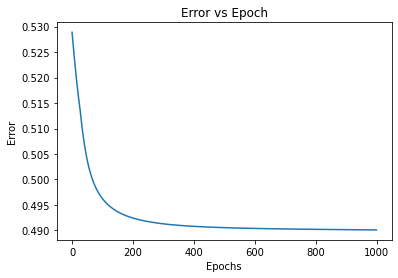

In [109]:
plt.figure()
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epoch")
plt.show()

## Conclusion
* The pooling layer satifies translation invariant property i.e. if we slightly shift the image the result of max pooling is near to the original image.
* The backpropagation algorithm is able to learn appropriate weights for the CNN.

## References
1. Deep Learning by Ian Goodfellow, 